# Part 1

# Import and warehouse data

Import relevant libraries

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Import input files

In [2]:
attr = pd.read_json('Part1 - Car-Attributes.json')
name = pd.read_csv('Part1 - Car name.csv')

Let's look at their shapes

In [3]:
print(attr.shape)
print(name.shape)

(398, 8)
(398, 1)


Both need to be concatenated along x axis which we will do in the next step

Concatenate them

In [4]:
car_data = pd.concat([attr,name],axis=1)

In [5]:
car_data

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0    18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1    15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2    18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3    16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4    17.0    8  302.0  140  3449  10.5  70       1                ford torino
..    ...  ...    ...  ...   ...   ...  ..     ...                        ...
393  27.0    4  140.0   86  2790  15.6  82       1            ford mustang gl
394  44.0    4   97.0   52  2130  24.6  82       2                  vw pickup
395  32.0    4  135.0   84  2295  11.6  82       1              dodge rampage
396  28.0    4  120.0   79  2625  18.6  82       1                ford ranger
397  31.0    4  119.0   82  2720  19.4  82       1                 chevy s-10

[398 rows x 9 columns]

Let's look at the final shape

In [6]:
car_data.shape

(398, 9)

Export the final dataset to local

In [7]:
car_data.to_csv('car_data.csv')
car_data.to_excel('car_data.xlsx')
car_data.to_json('car_data.json')

Let's drop car_name

In [8]:
car_data.drop('car_name',axis=1,inplace=True)

# Data cleansing

Let's check for missing/incorrect values

In [9]:
car_data.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

We can see there are no values. Let's next look at the stats

In [10]:
car_data.describe().transpose()

count         mean         std     min       25%     50%       75%  \
mpg     398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   
cyl     398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp    398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
wt      398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc     398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr      398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
origin  398.0     1.572864    0.802055     1.0     1.000     1.0     2.000   

           max  
mpg       46.6  
cyl        8.0  
disp     455.0  
wt      5140.0  
acc       24.8  
yr        82.0  
origin     3.0

We can see there is not hp. So it means it contains unusual values. Let's check it

In [11]:
car_data[car_data['hp'].str.isdigit().apply(lambda x:not x)]['hp']

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object

Let's impute the values with median

In [12]:
car_data['hp'] = car_data['hp'].replace('?',np.nan)

In [13]:
car_data['hp'].fillna(car_data['hp'].median(),inplace=True)

Let's change object datatype to int

In [14]:
car_data['hp'] = car_data['hp'].astype('int')

# Data analysis & visualisation

Let's look at the boxplots of all the continuous variables

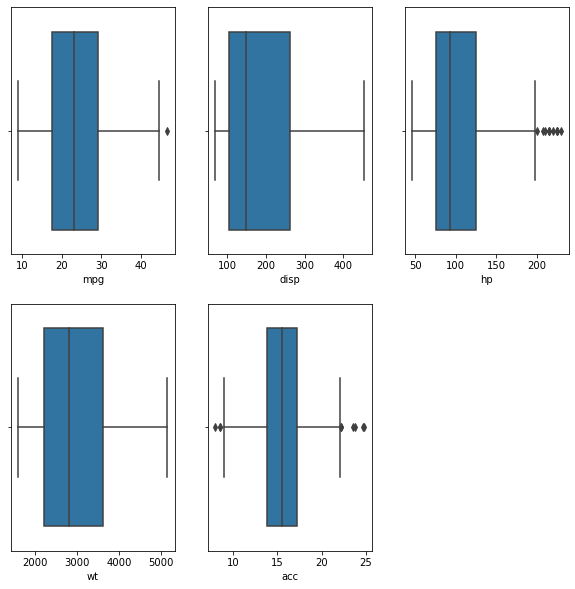

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
sns.boxplot(car_data['mpg']);

plt.subplot(2,3,2)
sns.boxplot(car_data['disp']);

plt.subplot(2,3,3)
sns.boxplot(car_data['hp']);

plt.subplot(2,3,4)
sns.boxplot(car_data['wt']);

plt.subplot(2,3,5)
sns.boxplot(car_data['acc']);

We can see that mpg, hp and acc have outliers

Let's next look at the distributions of those variables

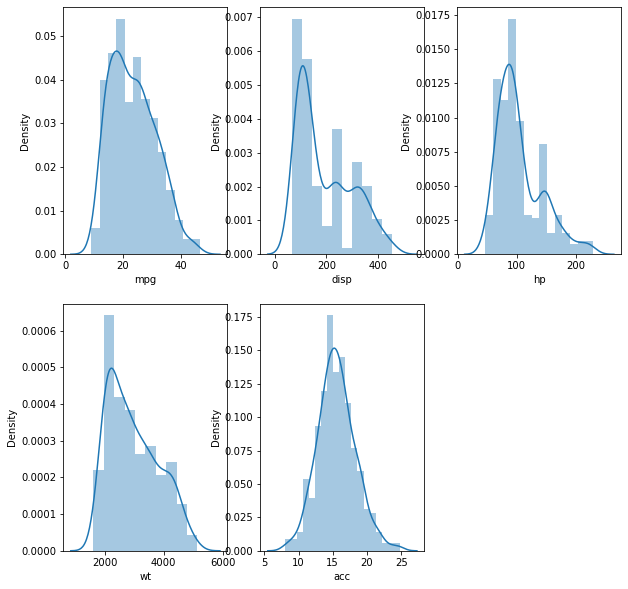

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
sns.distplot(car_data['mpg']);

plt.subplot(2,3,2)
sns.distplot(car_data['disp']);

plt.subplot(2,3,3)
sns.distplot(car_data['hp']);

plt.subplot(2,3,4)
sns.distplot(car_data['wt']);

plt.subplot(2,3,5)
sns.distplot(car_data['acc']);

We can see that except acc, the others are not symmetrical

Let's next look at the non continuous variables

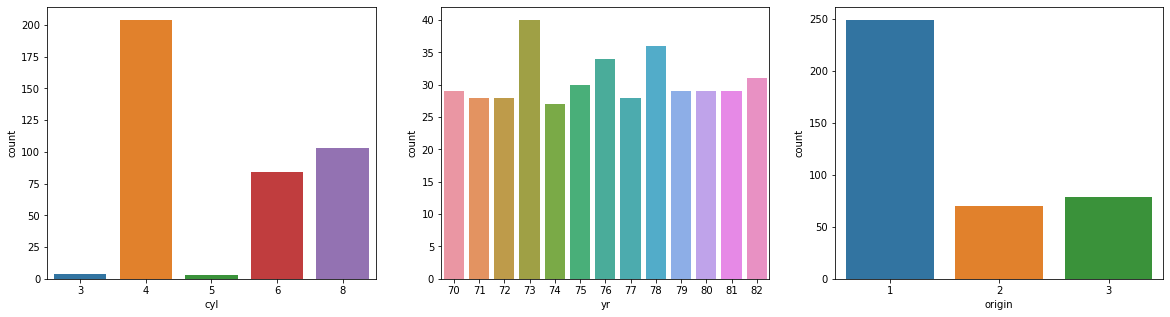

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(car_data['cyl']);

plt.subplot(1,3,2)
sns.countplot(car_data['yr']);

plt.subplot(1,3,3)
sns.countplot(car_data['origin']);

These values are varying along the x axis

Let's look at the impact of continuous variables on miles per gallon

Let's look at the relationship between mpg and disp

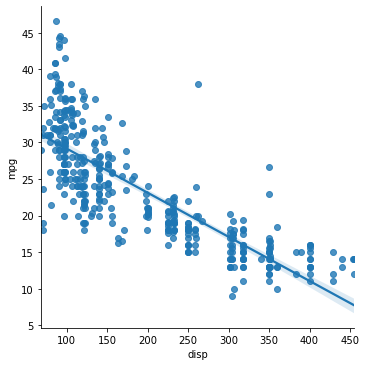

In [18]:
sns.lmplot('disp','mpg',car_data);

There is a clear negative relationship

Let's look at the relationship between hp and mpg

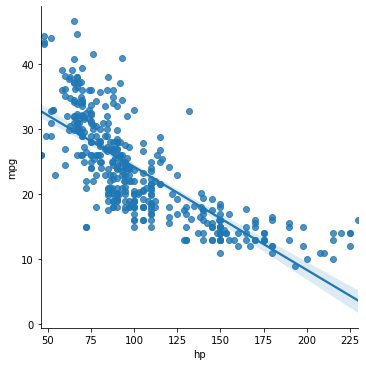

In [19]:
sns.lmplot('hp','mpg',data=car_data);

There is a clear negative relationship

Let's look at the relationship between wt and mpg

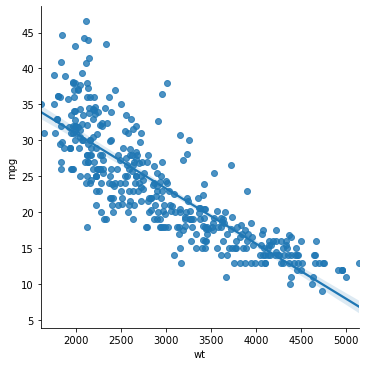

In [20]:
sns.lmplot('wt','mpg',data=car_data);

There is a clear negative relationship

Let's look at the relationship between acc and mpg

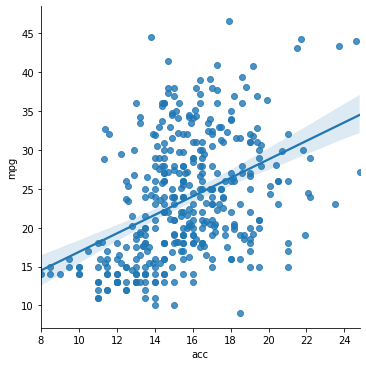

In [21]:
sns.lmplot('acc','mpg',data=car_data);

There is a clear positive relationship between them

Let's next look at the impact of categorical variables on mpg

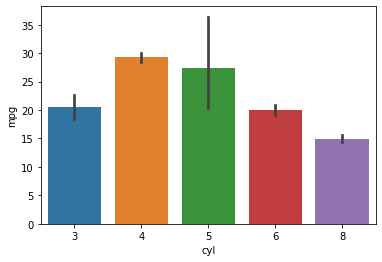

In [22]:
sns.barplot('cyl','mpg',data=car_data);

We can see that 4 cylinders are giving the higest mpg

Let' next look at the impace of model year

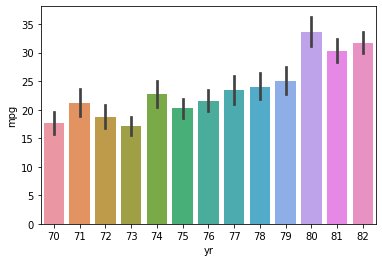

In [23]:
sns.barplot('yr','mpg',data=car_data);

There is a general increasing trend towards the newer vehicles as expected

Let's next look at the impact of origin

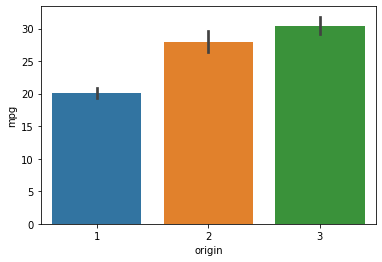

In [24]:
sns.barplot('origin','mpg',data=car_data);

This variable does have an impact as can be seen from 1 to 3 in an increasing fashion

Let's next look at the pairplot

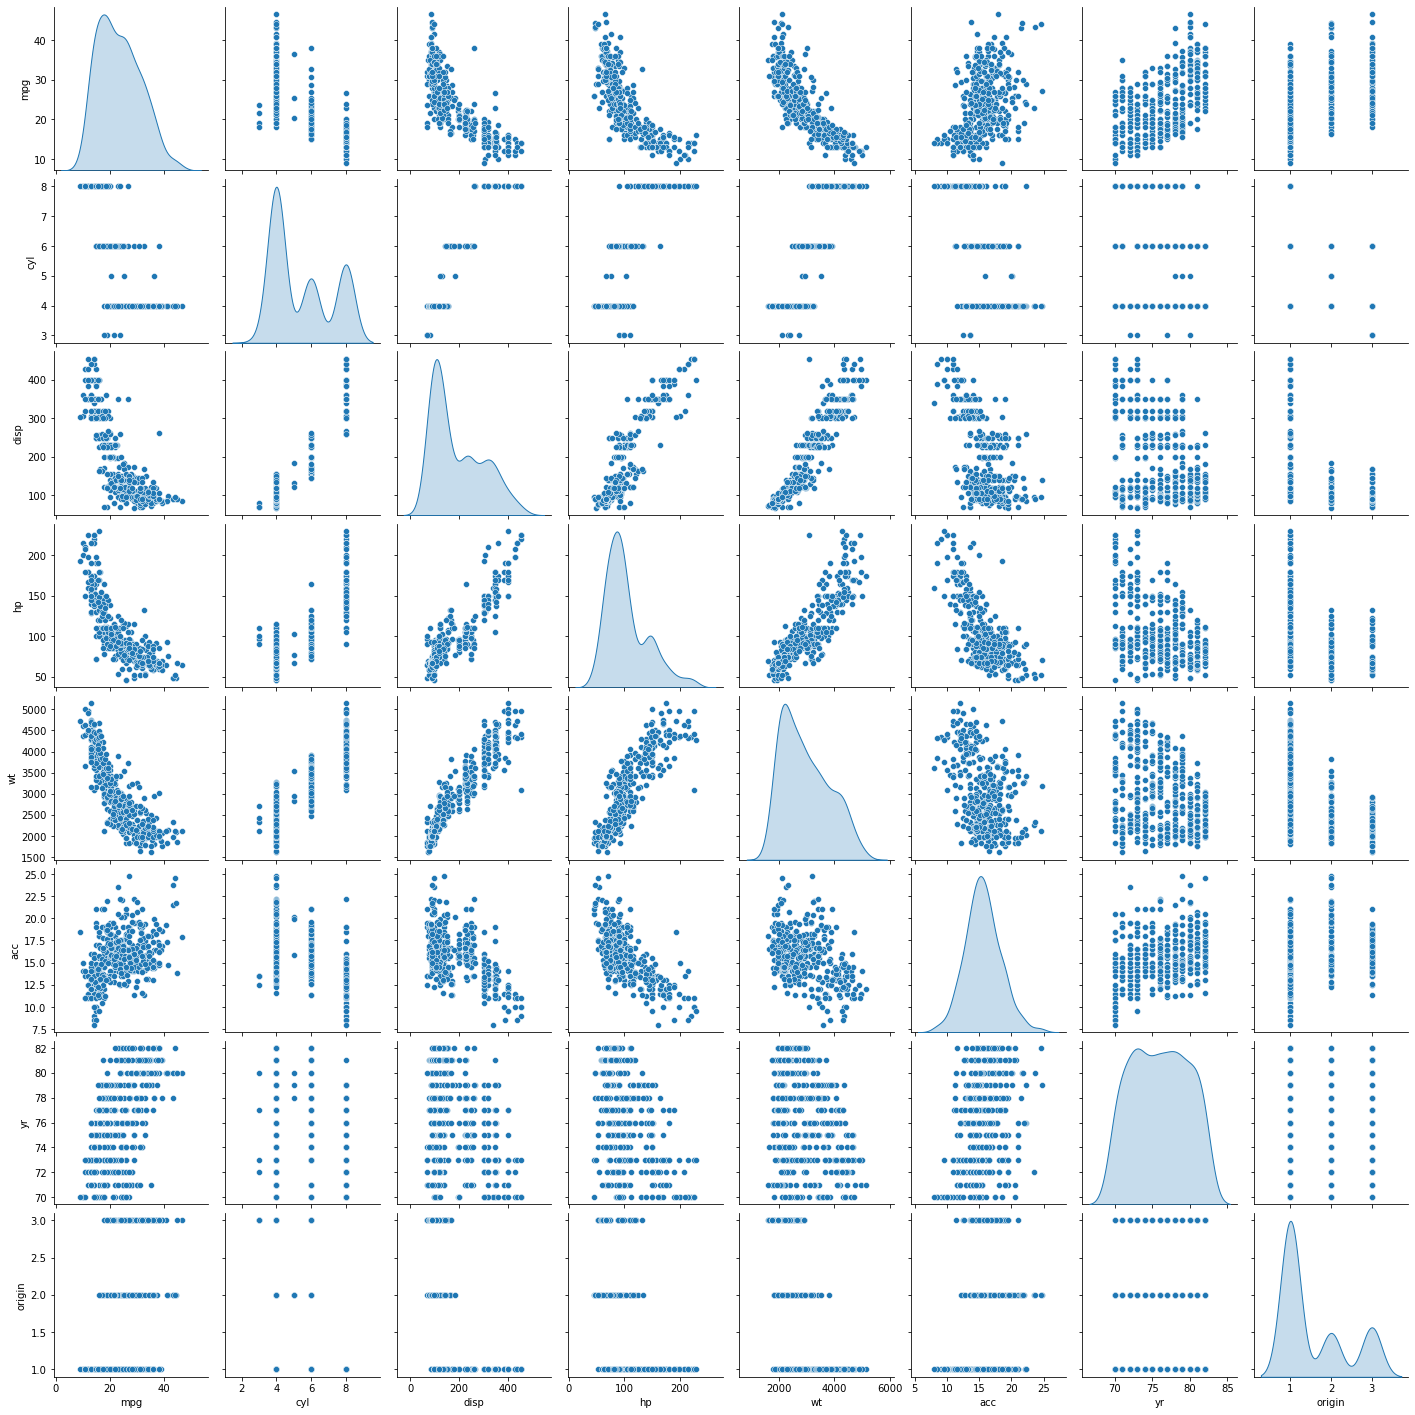

In [25]:
sns.pairplot(car_data,diag_kind='kde');

We can clearly see the interrelationships between the variables from the above graph. We can see three humps for some of the variables in their kde graphs. This seems to be a good number for the number of clusters.

# Machine learning

In [26]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import zscore

Let's first scale the data

In [27]:
car_data_scaled = car_data.apply(zscore)

<b>KMeans</b>

In [28]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meandistortions = []

In [29]:
for k in clusters:
    model = KMeans(k)
    model.fit(car_data_scaled)
    meandistortions.append(sum(np.min(cdist(car_data_scaled,model.cluster_centers_,metric="euclidean"),axis=1)) / car_data_scaled.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

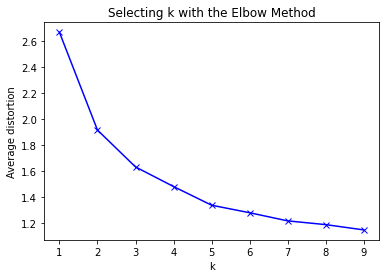

In [30]:
plt.plot(clusters,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

From the above diagram, it looks like the optimal number of clusters is 3 or 5.Let's go ahead with 3 for our analysis

<b>Heirarchical Clustering</b>

Let's first look at the dendogram

In [31]:
from scipy.cluster.hierarchy import cophenet,linkage,dendrogram
from scipy.spatial.distance import pdist

In [32]:
Z = linkage(car_data_scaled,metric='euclidean',method='average')
c,coph_dists = cophenet(Z,pdist(car_data_scaled))
c

0.7554228094784633

In [33]:
Z

array([[2.34000000e+02, 2.36000000e+02, 1.83961070e-01, 2.00000000e+00],
       [6.80000000e+01, 6.90000000e+01, 1.91106614e-01, 2.00000000e+00],
       [1.29000000e+02, 1.45000000e+02, 2.15669217e-01, 2.00000000e+00],
       ...,
       [7.88000000e+02, 7.90000000e+02, 3.34012749e+00, 2.18000000e+02],
       [7.91000000e+02, 7.92000000e+02, 3.47847251e+00, 2.98000000e+02],
       [7.86000000e+02, 7.93000000e+02, 5.05017924e+00, 3.98000000e+02]])

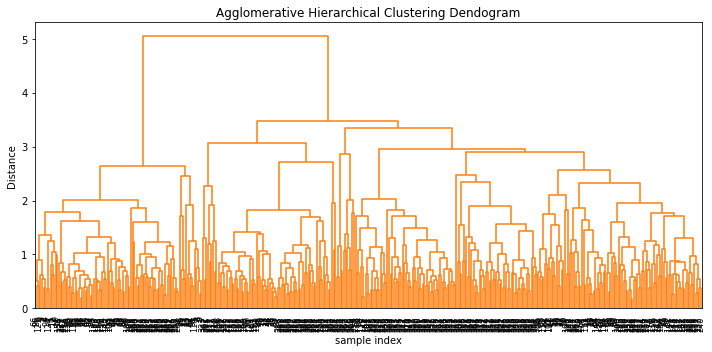

In [34]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.,color_threshold=40,leaf_font_size=8.)
plt.tight_layout()

We can see that the dendogram splits into too many groups from top to bottom. We will go ahead with 3 clusters

Both the methods differ in the means to achieve the results. Hierarchial clustering allows us to look at the dendogram and then decide on the number of clusters while KMeans clustering requires us to have a knowledge of the number of clusters even before attempting to run the model. KMeans is less computationally expensive than Hierarchical clustering as we need the distances between every pair of obervations in case of Hierarchical clustering. KMeans clustering starts with random choice of centroids and which might lead to different results at different times while that is not the case with Hierarchical clustering.

We can see that 3 seems to a reasonable number for the number of clusters. The elbow diagram says that 3 might be a good value for the number of clusters. The number of clusters increases drastically as we move down the dendogram. At a distance of around 3.5 we can see 3 clusters which seems to be a bit stable. Let's proceed with 3 clusters for our analysis

Let's cluster using KMeans.

In [35]:
model = KMeans(3,random_state=100)

In [36]:
model.fit(car_data_scaled)

KMeans(n_clusters=3, random_state=100)

In [37]:
car_data['cluster'] = model.labels_

Let's look at the median of each variable by cluster

In [38]:
car_data.groupby('cluster').median()

mpg  cyl   disp   hp      wt   acc    yr  origin
cluster                                                   
0        21.0  6.0  198.0   93  2962.0  16.5  76.0     1.0
1        14.0  8.0  350.0  150  4147.5  13.0  73.0     1.0
2        30.7  4.0   98.0   75  2160.0  15.8  78.0     2.0

Let's split the data into three groups and perform Linear Regression for each of them

<b>Group Zero</b>

In [39]:
car_data_0 = car_data[car_data['cluster'] == 0]
car_data_1 = car_data[car_data['cluster'] == 1]
car_data_2 = car_data[car_data['cluster'] == 2]

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
X = car_data_0.drop(['mpg','cluster'],axis=1)
y = car_data_0['mpg']

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(X,y)

LinearRegression()

Let's find the coefficients

In [45]:
car_0 = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(lr.coef_)],axis=1)
car_0.columns = ['Field','Coeff_0']
car_0

Field   Coeff_0
0     cyl -0.252115
1    disp  0.000335
2      hp -0.049914
3      wt -0.004618
4     acc -0.181578
5      yr  0.611521
6  origin -0.770334

<b>Group One</b>

In [46]:
X = car_data_1.drop(['mpg','cluster'],axis=1)
y = car_data_1['mpg']

In [47]:
lr.fit(X,y)

LinearRegression()

In [48]:
car_1 = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(lr.coef_)],axis=1)
car_1.columns = ['Field','Coeff_1']
car_1

Field   Coeff_1
0     cyl -0.471011
1    disp  0.007277
2      hp -0.024945
3      wt -0.002127
4     acc -0.196483
5      yr  0.396747
6  origin  0.000000

<b>Group Two</b>

In [49]:
X = car_data_2.drop(['mpg','cluster'],axis=1)
y = car_data_2['mpg']

In [50]:
lr.fit(X,y)

LinearRegression()

In [51]:
car_2 = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(lr.coef_)],axis=1)
car_2.columns = ['Field','Coeff_2']
car_2

Field   Coeff_2
0     cyl  0.790346
1    disp  0.007179
2      hp -0.015246
3      wt -0.008334
4     acc  0.457516
5      yr  1.004191
6  origin -0.383765

Let's do for the entire data

In [52]:
X = car_data.drop(['mpg','cluster'],axis=1)
y = car_data['mpg']

In [53]:
lr.fit(X,y)

LinearRegression()

In [54]:
car = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(lr.coef_)],axis=1)
car.columns = ['Field','Coeff']
car

Field     Coeff
0     cyl -0.420558
1    disp  0.019061
2      hp -0.012426
3      wt -0.006697
4     acc  0.097919
5      yr  0.755748
6  origin  1.424613

Let's join the three tables to compare them

In [55]:
car_0.merge(car_1,on=['Field'],how='inner').merge(car_2,on=['Field'],how='inner').merge(car,on=['Field'],how='inner')

Field   Coeff_0   Coeff_1   Coeff_2     Coeff
0     cyl -0.252115 -0.471011  0.790346 -0.420558
1    disp  0.000335  0.007277  0.007179  0.019061
2      hp -0.049914 -0.024945 -0.015246 -0.012426
3      wt -0.004618 -0.002127 -0.008334 -0.006697
4     acc -0.181578 -0.196483  0.457516  0.097919
5      yr  0.611521  0.396747  1.004191  0.755748
6  origin -0.770334  0.000000 -0.383765  1.424613

We can see that the coefficients are different for the different groups and the data as a whole. This is because different groups have different characteristics.By clustering, we are trying to segregate the entire data into different groups with similar characteristics. Generally when the data is not very homogenous, it helps to segregate it into several groups and then model those as this will very likely improve the performance of the model in terms of prediction.

# Improvisation

The data quality has been almost fine except for some issues with a few variables. The quantity can be improved a bit as the present quantity is not big enough. The data is fine from a variety perspective. A variety of variables are present that capture the different characteristics of the cars. The data is also fine from a velocity and veracity perspective for our purpose

# Part 2

# Synthetic Data Generation Model 

Let's input the data

In [56]:
wine_input = pd.read_excel('Part2 - Company.xlsx')

In [57]:
wine_input.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

We can see missing values in Quality variable

Let's create two clusters as the Quality variable has two distinct values

In [58]:
clusters = KMeans(n_clusters=2)

In [59]:
clusters.fit(wine_input.drop('Quality',axis=1))

KMeans(n_clusters=2)

In [60]:
wine_input['Cluster'] = clusters.labels_

We will use the two clusters to impute the missing values for the Quality variable of each group with the mode of Quality variable of that respective group

The wine dataset with clusters is below

In [61]:
wine_input

A    B    C    D    Quality  Cluster
0    47   27   45  108  Quality A        1
1   174  133  134  166  Quality B        0
2   159  163  135  131        NaN        0
3    61   23    3   44  Quality A        1
4    59   60    9   68  Quality A        1
..  ...  ...  ...  ...        ...      ...
56  200  186  185  179  Quality B        0
57  137  182  165  199        NaN        0
58   88   39    9  102        NaN        1
59  180  157  192  198        NaN        0
60  157  135  135  156        NaN        0

[61 rows x 6 columns]

Let's divide the dataset into two groups based on the cluster values

In [62]:
group1 = wine_input[wine_input['Cluster'] == 0]
group2 = wine_input[wine_input['Cluster'] == 1]

Let's impute Quality variable of each group with the mode of the same variable

In [63]:
group1['Quality'] = group1['Quality'].fillna(group1['Quality'].mode().iloc[0])
group2['Quality'] = group2['Quality'].fillna(group2['Quality'].mode().iloc[0])

We have imputed the variable. Let's now concatenate both of them and drop the Cluster variable

In [64]:
wine_input_imputed = pd.concat([group1,group2],axis=0).sort_index()
wine_input_imputed.drop('Cluster',axis=1,inplace=True)

In [65]:
wine_input_imputed

A    B    C    D    Quality
0    47   27   45  108  Quality A
1   174  133  134  166  Quality B
2   159  163  135  131  Quality B
3    61   23    3   44  Quality A
4    59   60    9   68  Quality A
..  ...  ...  ...  ...        ...
56  200  186  185  179  Quality B
57  137  182  165  199  Quality B
58   88   39    9  102  Quality A
59  180  157  192  198  Quality B
60  157  135  135  156  Quality B

[61 rows x 5 columns]

We have finally designed a synthetic generation model which can impute values wherever the company has missed recording the data.

# Part 3

# Data: Import, clean and pre-process the data

Let's input the data

In [66]:
auto_input = pd.read_csv('Part3 - vehicle.csv')

In [67]:
auto_input.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

Let's look at the stats

In [68]:
auto_input.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

Let's look at the class variable

In [69]:
auto_input['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [70]:
vehicle_class = {'car':0,'bus':1,'van':2}

In [71]:
auto_input['class'] = auto_input['class'].replace(vehicle_class)

Let's look at the missing values

In [72]:
auto_input.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

We can see that several variables are missing values. We will impute them with median values of the respective variables

In [73]:
from sklearn.impute import SimpleImputer

In [74]:
impute = SimpleImputer(strategy='median')

In [75]:
auto_input_val = impute.fit_transform(auto_input)

In [76]:
auto_input = pd.DataFrame(auto_input_val,columns=auto_input.columns)

We have imputed all the values with the median values

Let's at the distplots of all the variables

In [77]:
auto_input.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

# EDA and visualisation

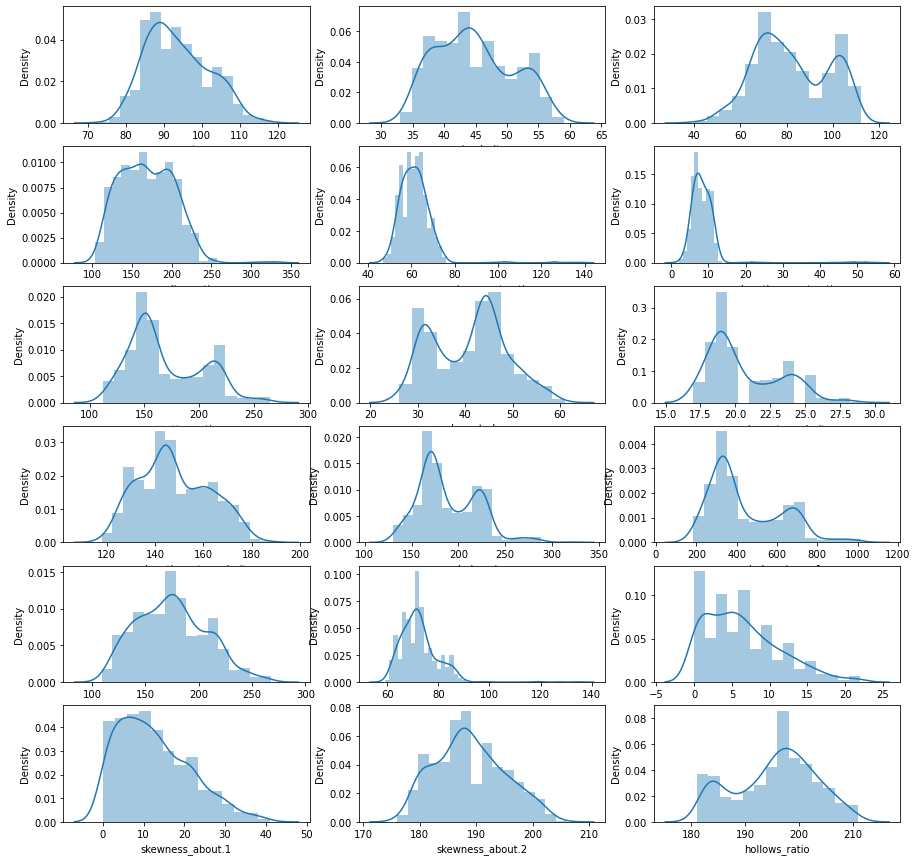

In [78]:
plt.figure(figsize=(15,15))
plt.subplot(6,3,1)
sns.distplot(auto_input['compactness']);

plt.subplot(6,3,2)
sns.distplot(auto_input['circularity']);

plt.subplot(6,3,3)
sns.distplot(auto_input['distance_circularity']);

plt.subplot(6,3,4)
sns.distplot(auto_input['radius_ratio']);

plt.subplot(6,3,5)
sns.distplot(auto_input['pr.axis_aspect_ratio']);

plt.subplot(6,3,6)
sns.distplot(auto_input['max.length_aspect_ratio']);

plt.subplot(6,3,7)
sns.distplot(auto_input['scatter_ratio']);

plt.subplot(6,3,8)
sns.distplot(auto_input['elongatedness']);

plt.subplot(6,3,9)
sns.distplot(auto_input['pr.axis_rectangularity']);

plt.subplot(6,3,10)
sns.distplot(auto_input['max.length_rectangularity']);

plt.subplot(6,3,11)
sns.distplot(auto_input['scaled_variance']);

plt.subplot(6,3,12)
sns.distplot(auto_input['scaled_variance.1']);

plt.subplot(6,3,13)
sns.distplot(auto_input['scaled_radius_of_gyration']);

plt.subplot(6,3,14)
sns.distplot(auto_input['scaled_radius_of_gyration.1']);

plt.subplot(6,3,15)
sns.distplot(auto_input['skewness_about']);

plt.subplot(6,3,16)
sns.distplot(auto_input['skewness_about.1']);

plt.subplot(6,3,17)
sns.distplot(auto_input['skewness_about.2']);

plt.subplot(6,3,18)
sns.distplot(auto_input['hollows_ratio']);

We can see that the distributions are not exactly normal for several of the variables.

Let's next look at the box plots of them

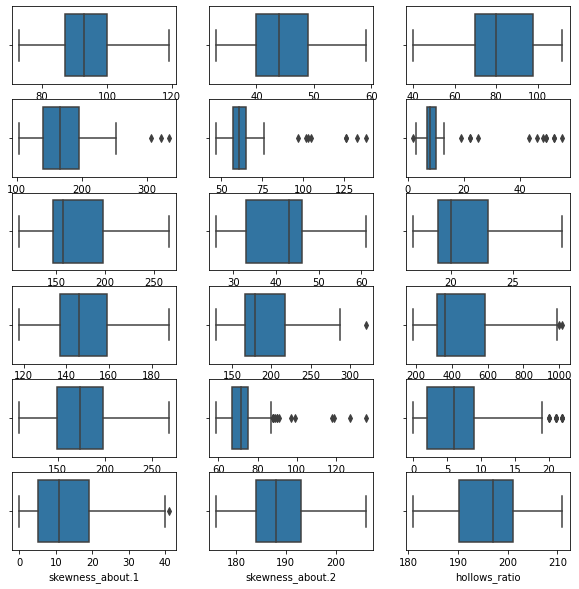

In [79]:
plt.figure(figsize=(10,10))
plt.subplot(6,3,1)
sns.boxplot(auto_input['compactness']);

plt.subplot(6,3,2)
sns.boxplot(auto_input['circularity']);

plt.subplot(6,3,3)
sns.boxplot(auto_input['distance_circularity']);

plt.subplot(6,3,4)
sns.boxplot(auto_input['radius_ratio']);

plt.subplot(6,3,5)
sns.boxplot(auto_input['pr.axis_aspect_ratio']);

plt.subplot(6,3,6)
sns.boxplot(auto_input['max.length_aspect_ratio']);

plt.subplot(6,3,7)
sns.boxplot(auto_input['scatter_ratio']);

plt.subplot(6,3,8)
sns.boxplot(auto_input['elongatedness']);

plt.subplot(6,3,9)
sns.boxplot(auto_input['pr.axis_rectangularity']);

plt.subplot(6,3,10)
sns.boxplot(auto_input['max.length_rectangularity']);

plt.subplot(6,3,11)
sns.boxplot(auto_input['scaled_variance']);

plt.subplot(6,3,12)
sns.boxplot(auto_input['scaled_variance.1']);

plt.subplot(6,3,13)
sns.boxplot(auto_input['scaled_radius_of_gyration']);

plt.subplot(6,3,14)
sns.boxplot(auto_input['scaled_radius_of_gyration.1']);

plt.subplot(6,3,15)
sns.boxplot(auto_input['skewness_about']);

plt.subplot(6,3,16)
sns.boxplot(auto_input['skewness_about.1']);

plt.subplot(6,3,17)
sns.boxplot(auto_input['skewness_about.2']);

plt.subplot(6,3,18)
sns.boxplot(auto_input['hollows_ratio']);

We can see that some variables have outliers.We will go ahead with them

We will next see the bivariate plots

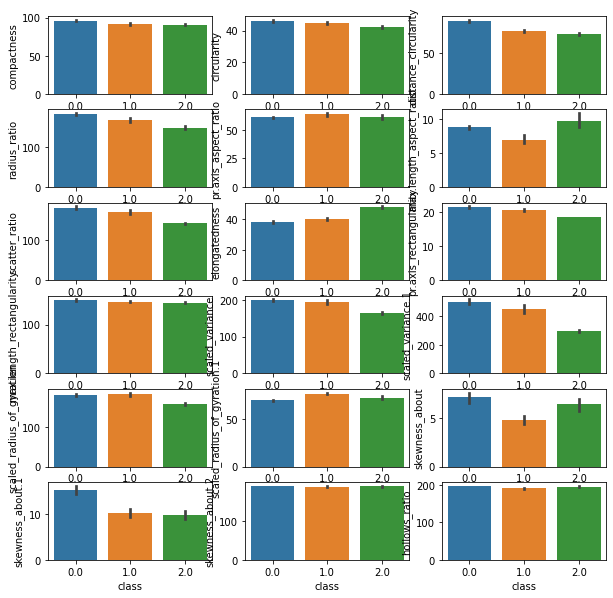

In [80]:
plt.figure(figsize=(10,10))
plt.subplot(6,3,1)
sns.barplot('class','compactness',data=auto_input);

plt.subplot(6,3,2)
sns.barplot('class','circularity',data=auto_input);

plt.subplot(6,3,3)
sns.barplot('class','distance_circularity',data=auto_input);

plt.subplot(6,3,4)
sns.barplot('class','radius_ratio',data=auto_input);

plt.subplot(6,3,5)
sns.barplot('class','pr.axis_aspect_ratio',data=auto_input);

plt.subplot(6,3,6)
sns.barplot('class','max.length_aspect_ratio',data=auto_input);

plt.subplot(6,3,7)
sns.barplot('class','scatter_ratio',data=auto_input);

plt.subplot(6,3,8)
sns.barplot('class','elongatedness',data=auto_input);

plt.subplot(6,3,9)
sns.barplot('class','pr.axis_rectangularity',data=auto_input);

plt.subplot(6,3,10)
sns.barplot('class','max.length_rectangularity',data=auto_input);

plt.subplot(6,3,11)
sns.barplot('class','scaled_variance',data=auto_input);

plt.subplot(6,3,12)
sns.barplot('class','scaled_variance.1',data=auto_input);

plt.subplot(6,3,13)
sns.barplot('class','scaled_radius_of_gyration',data=auto_input);

plt.subplot(6,3,14)
sns.barplot('class','scaled_radius_of_gyration.1',data=auto_input);

plt.subplot(6,3,15)
sns.barplot('class','skewness_about',data=auto_input);

plt.subplot(6,3,16)
sns.barplot('class','skewness_about.1',data=auto_input);

plt.subplot(6,3,17)
sns.barplot('class','skewness_about.2',data=auto_input);

plt.subplot(6,3,18)
sns.barplot('class','hollows_ratio',data=auto_input);

We can see variations in variables along the classes(some high and some low). It is good to see the variation in variables along classes. It means the variables are contributing to the model.

Let's perform a multivariable EDA

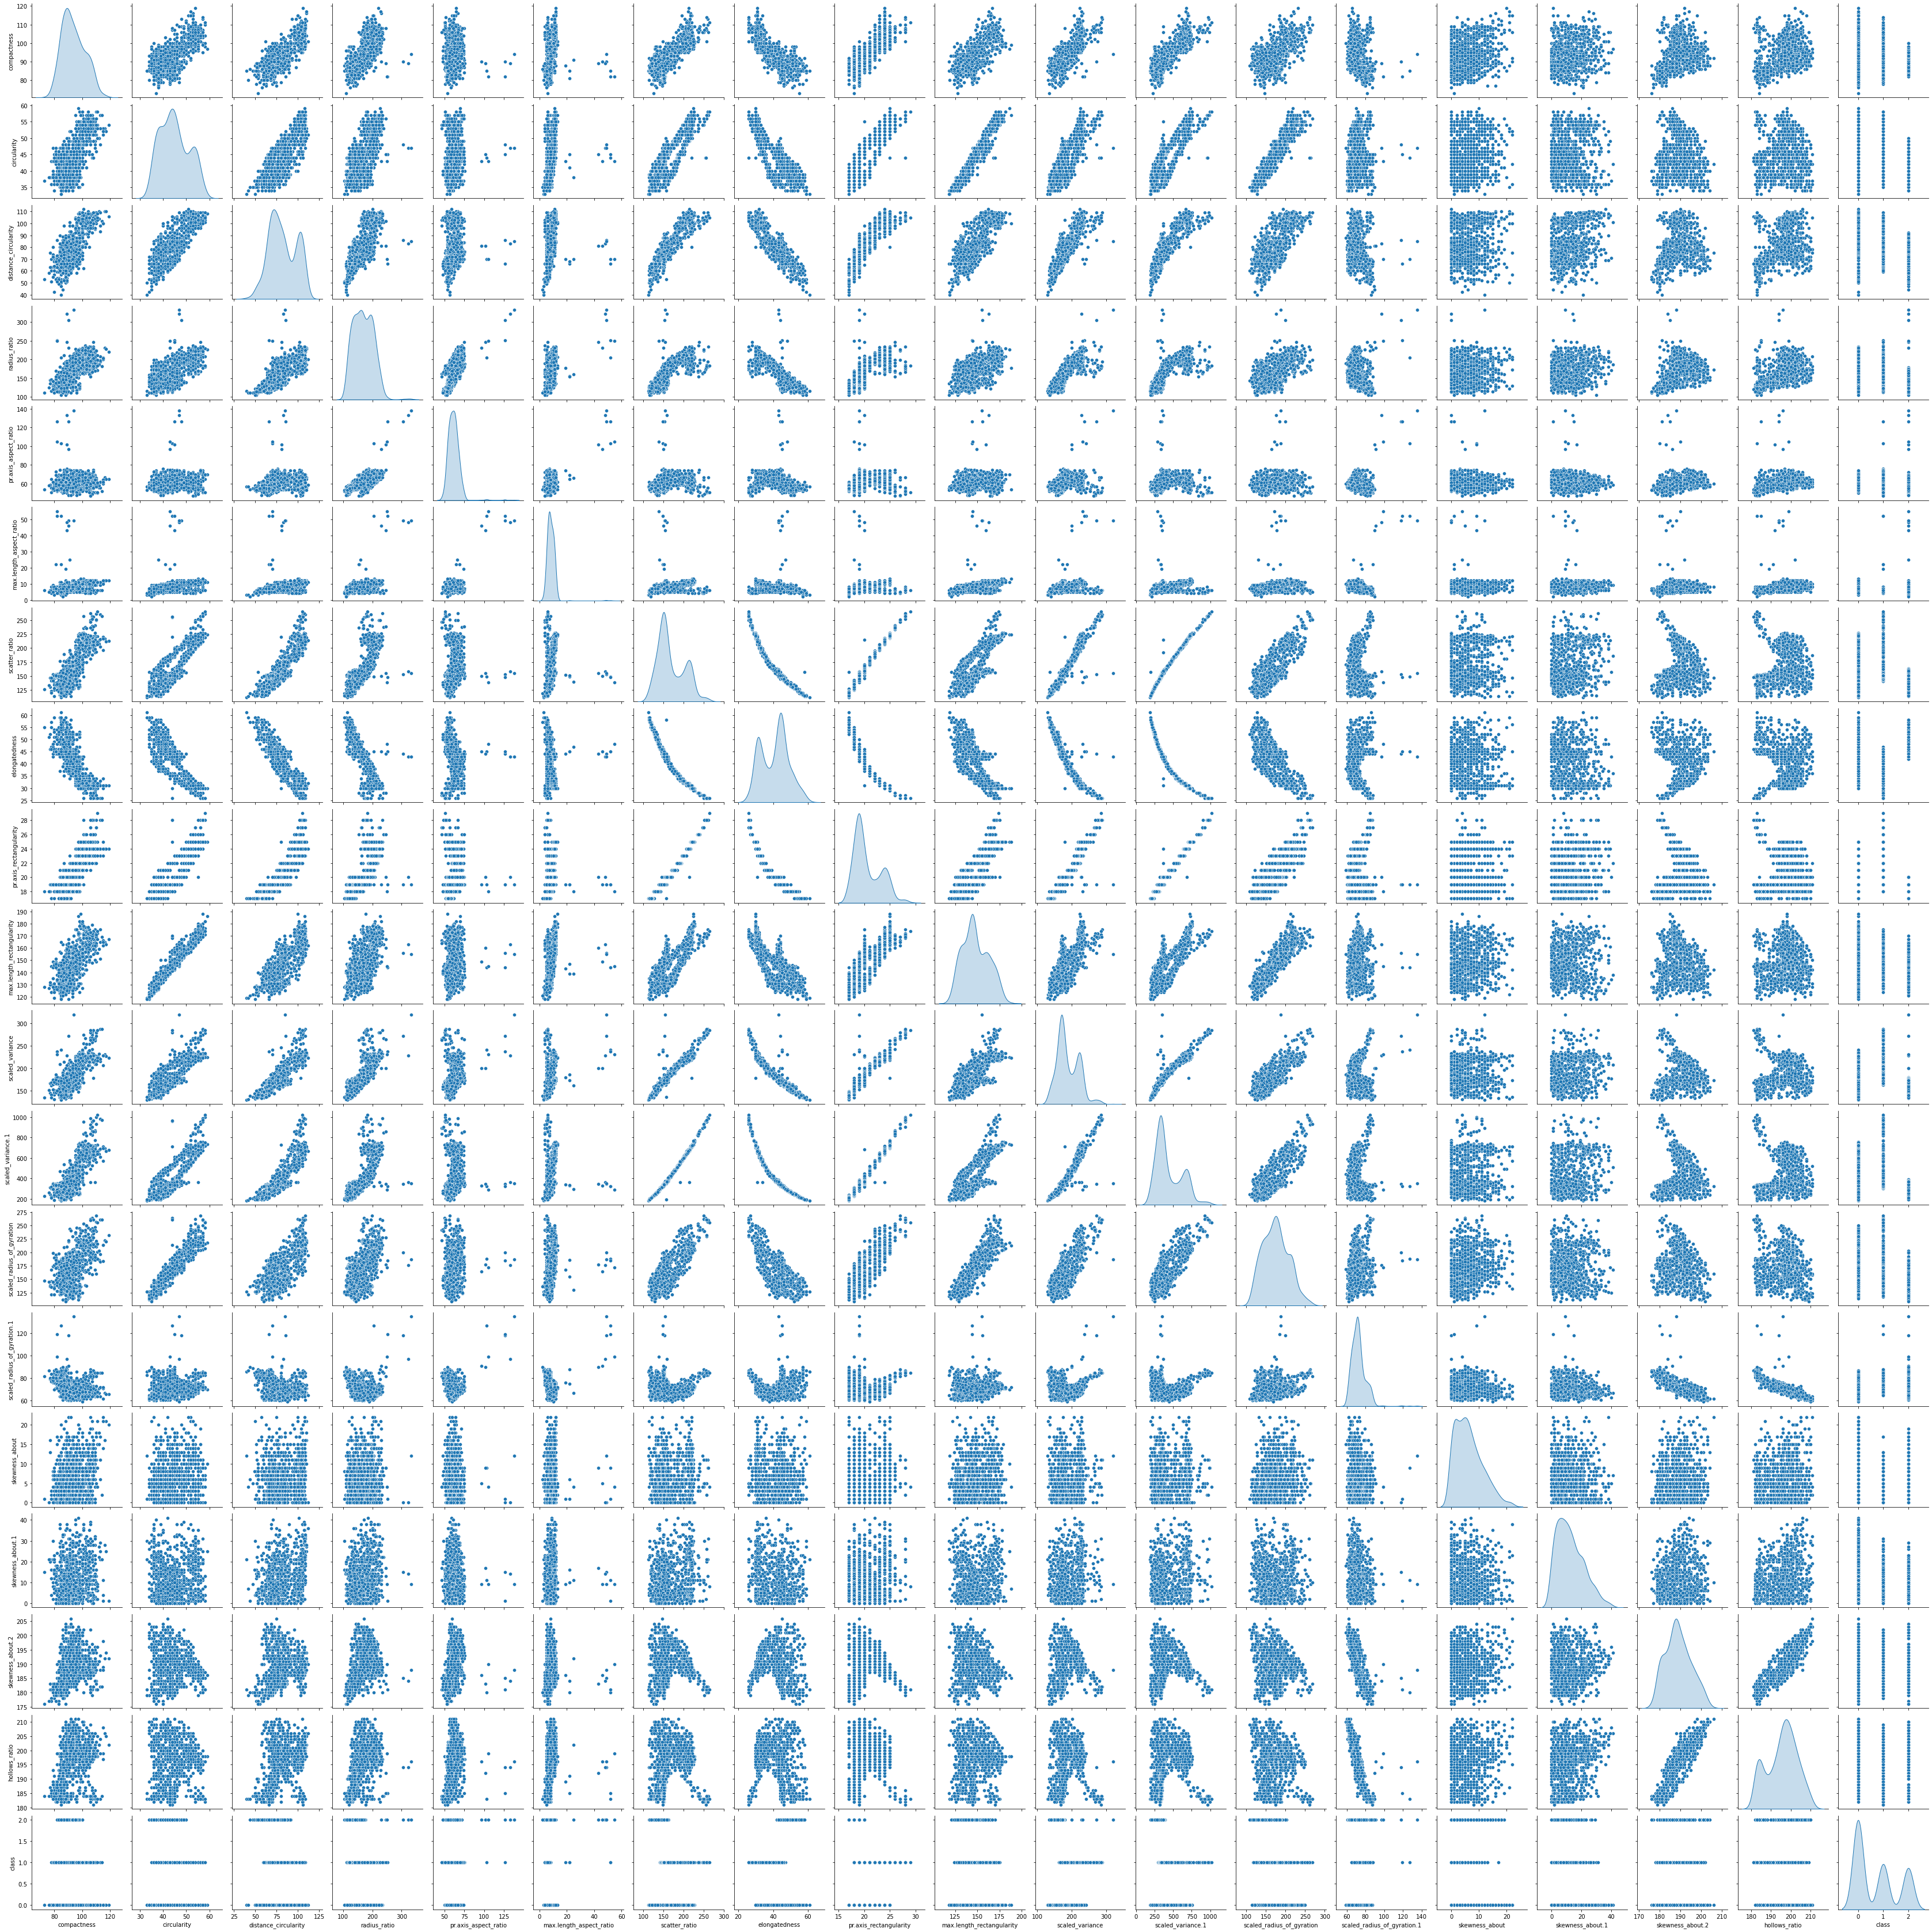

In [81]:
sns.pairplot(auto_input,diag_kind='kde');

We can see that several of the variables are not independent which is a violation of the independence assumption. We will still go ahead

# Classifier

Let's design an SVM classifier

In [82]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [83]:
X = auto_input.drop('class',axis=1)
y = auto_input['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [84]:
svc = SVC(C=100000)

In [85]:
svc.fit(X_train,y_train)

SVC(C=100000)

In [86]:
y_pred = svc.predict(X_test)

In [87]:
svc.score(X_train,y_train)

1.0

In [88]:
svc.score(X_test,y_test)

0.9821428571428571

Let's look at the classification metrics

In [89]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

Out of sample score

In [90]:
print(accuracy_score(y_test,y_pred))

0.9821428571428571


In [91]:
print(confusion_matrix(y_test,y_pred))

[[135   0   0]
 [  1  79   2]
 [  2   0  61]]


In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       135
         1.0       1.00      0.96      0.98        82
         2.0       0.97      0.97      0.97        63

    accuracy                           0.98       280
   macro avg       0.98      0.98      0.98       280
weighted avg       0.98      0.98      0.98       280



We can see that the svm model has done a wonderful job as is evident from the metrics. Let's now perform dimentional reduction and repeat the same exercise

# Dimensional reduction

Let's scale the data first

In [93]:
from scipy.stats import zscore
XScaled = X.apply(zscore)

In [94]:
from sklearn.decomposition import PCA

In [95]:
pca = PCA(n_components=8)
pca.fit(XScaled)

PCA(n_components=8)

In [96]:
pca.explained_variance_

array([9.40460261, 3.01492206, 1.90352502, 1.17993747, 0.91726063,
       0.53999263, 0.35887012, 0.22193246])

In [97]:
pca.explained_variance_ratio_

array([0.52186034, 0.16729768, 0.10562639, 0.0654746 , 0.05089869,
       0.02996413, 0.01991366, 0.01231501])

In [98]:
np.sum(pca.explained_variance_ratio_)

0.973350494450683

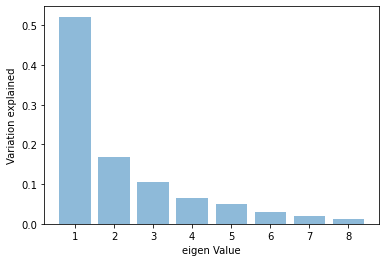

In [99]:
plt.bar(list(range(1,9)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

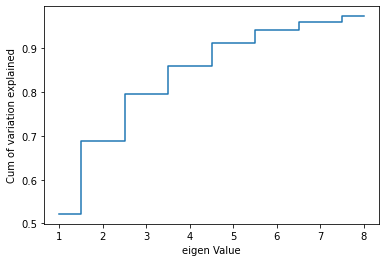

In [100]:
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

Let's use first eight componenets as they explain more than 97% of the variation

In [101]:
pca = PCA(n_components=8)

In [102]:
Xpca = pca.fit_transform(XScaled)

In [103]:
Xpca

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00, ...,
        -7.57446693e-01, -9.01124283e-01, -3.81106357e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01, ...,
        -5.17161832e-01,  3.78636988e-01,  2.47058909e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02, ...,
         7.05041037e-01, -3.45837595e-02,  4.82771767e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01, ...,
        -2.17069763e-01,  5.73248962e-01,  1.10477865e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01, ...,
        -4.02491279e-01, -2.02405787e-01,  3.20621635e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01, ...,
        -3.35637136e-01,  5.80978683e-02, -2.48034955e-01]])

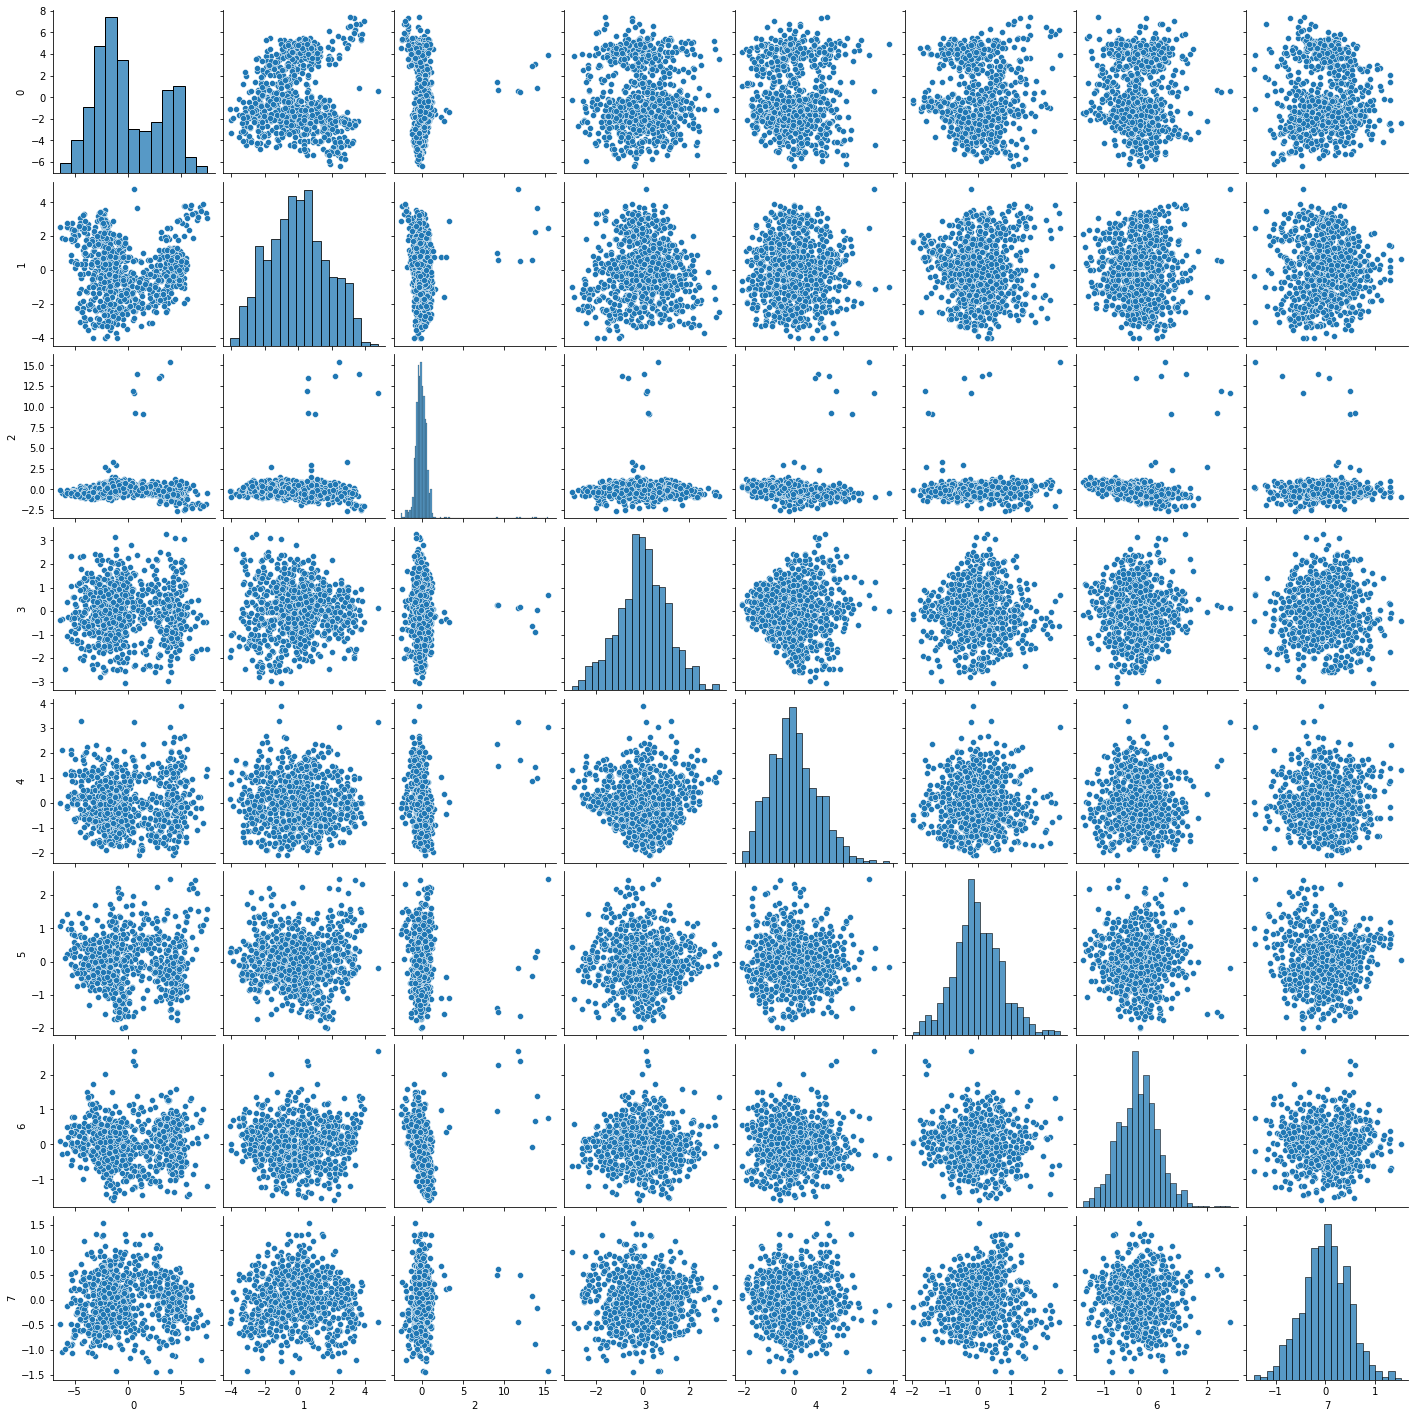

In [104]:
sns.pairplot(pd.DataFrame(Xpca));

The factors all look independent from each other

# Classifier

In [105]:
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.33, random_state=42)

In [106]:
svc = SVC(C=100)

In [107]:
svc.fit(X_train,y_train)

SVC(C=100)

In [108]:
print(svc.score(X_train,y_train))

0.9982332155477032


Out of sample score

In [109]:
print(svc.score(X_test,y_test))

0.9428571428571428


In [110]:
y_pred = svc.predict(X_test)

In [111]:
print(confusion_matrix(y_test,y_pred))

[[132   0   3]
 [  6  75   1]
 [  5   1  57]]


In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       135
         1.0       0.99      0.91      0.95        82
         2.0       0.93      0.90      0.92        63

    accuracy                           0.94       280
   macro avg       0.95      0.93      0.94       280
weighted avg       0.94      0.94      0.94       280



# Conclusion

We used 8 dimensions in the model now as opposed to 18 variables we used initially which is more than 50% reduction in dimensions. These explain around 97.33% of the variance explained by all the variables. The out of sample score for this is around 94.3% as opposed to 98.2% for the initial model. This is fine considering the fact that the initial model was using 18 features while this is using 8 which is more than a 50% dimensional reduction.

# Part 4

# EDA and visualisation

Let's input the data

In [113]:
cricket_input = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')

In [114]:
cricket_input

Name   Runs    Ave      SR  Fours  Sixes   HF
0            NaN    NaN    NaN     NaN    NaN    NaN  NaN
1       CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2            NaN    NaN    NaN     NaN    NaN    NaN  NaN
3      G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4            NaN    NaN    NaN     NaN    NaN    NaN  NaN
..           ...    ...    ...     ...    ...    ...  ...
175  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0
176          NaN    NaN    NaN     NaN    NaN    NaN  NaN
177     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0
178          NaN    NaN    NaN     NaN    NaN    NaN  NaN
179     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0

[180 rows x 7 columns]

Let's remove all the NaN's 

In [115]:
cricket_input = cricket_input.dropna()
cricket_input

Name   Runs    Ave      SR  Fours  Sixes   HF
1       CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
3      G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
5       V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
7       CL White  479.0  43.54  149.68   41.0   20.0  5.0
9       S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0
..           ...    ...    ...     ...    ...    ...  ...
171       Z Khan   12.0   6.00   70.58    1.0    0.0  0.0
173   WD Parnell   19.0   4.75   70.37    2.0    0.0  0.0
175  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0
177     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0
179     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0

[90 rows x 7 columns]

# EDA and visualisation

Let's look at the distributions

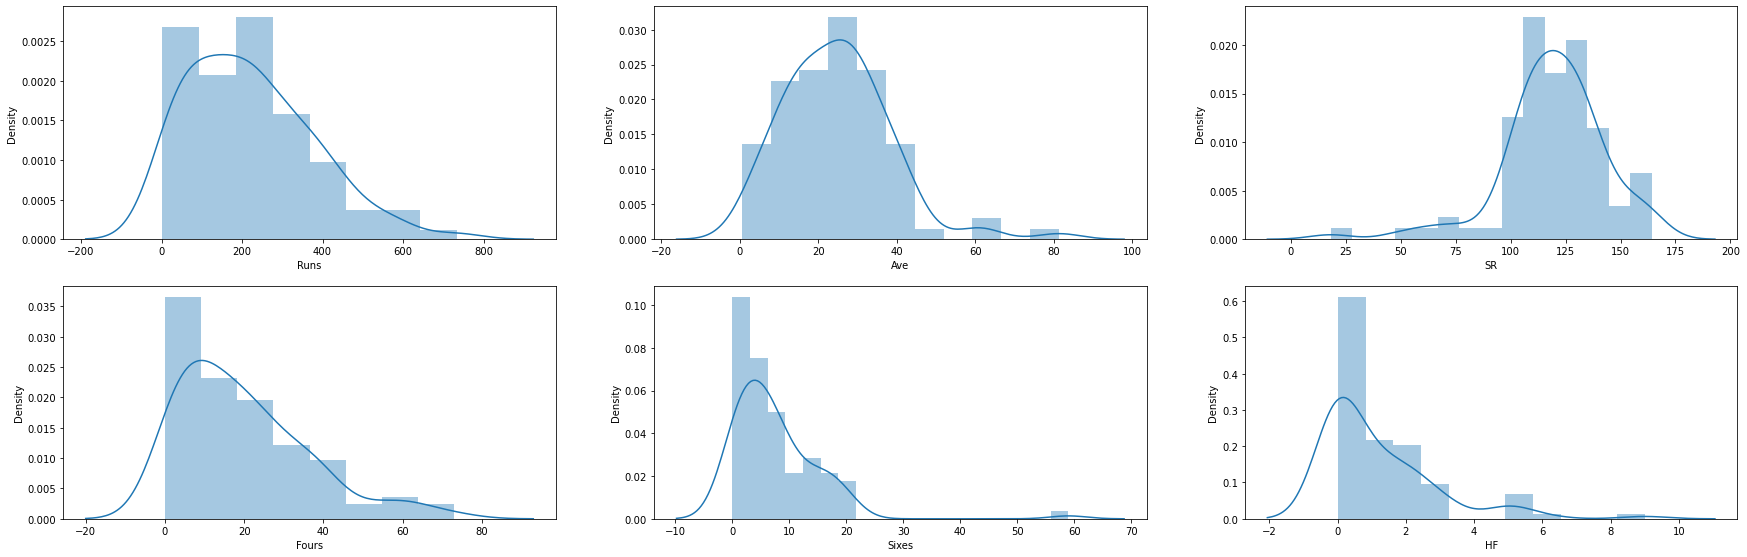

In [116]:
plt.figure(figsize=(30,30))
plt.subplot(6,3,1)
sns.distplot(cricket_input['Runs']);

plt.subplot(6,3,2)
sns.distplot(cricket_input['Ave']);

plt.subplot(6,3,3)
sns.distplot(cricket_input['SR']);

plt.subplot(6,3,4)
sns.distplot(cricket_input['Fours']);

plt.subplot(6,3,5)
sns.distplot(cricket_input['Sixes']);

plt.subplot(6,3,6)
sns.distplot(cricket_input['HF']);

Most of the variables are skewed to the right

Let's now look at the interactions between variables

Let's see if there is a relationship between number of runs scored and strike rate

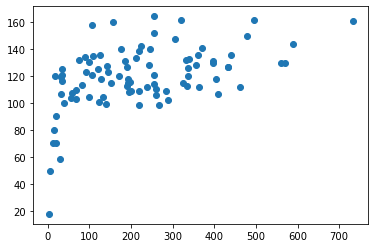

In [117]:
plt.scatter('Runs','SR',data=cricket_input);

There seems to be a positive relationship

Let's now look at the relationship between number of fours scored and number of sixes scored

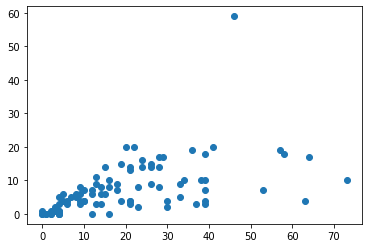

In [118]:
plt.scatter('Fours','Sixes',data=cricket_input);

There does seem to be some relationship but not very strong

Let's now look at the relationship between runs scored, average runs scored and half centuries scored

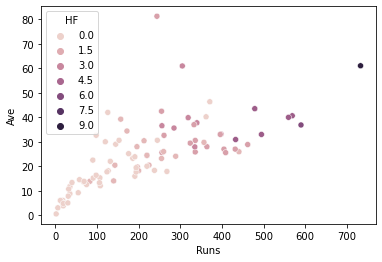

In [119]:
sns.scatterplot('Runs','Ave',data=cricket_input,hue='HF');

There is a relationship between all the three variables and they are going in the same direction.

Let's now look at the pairplot

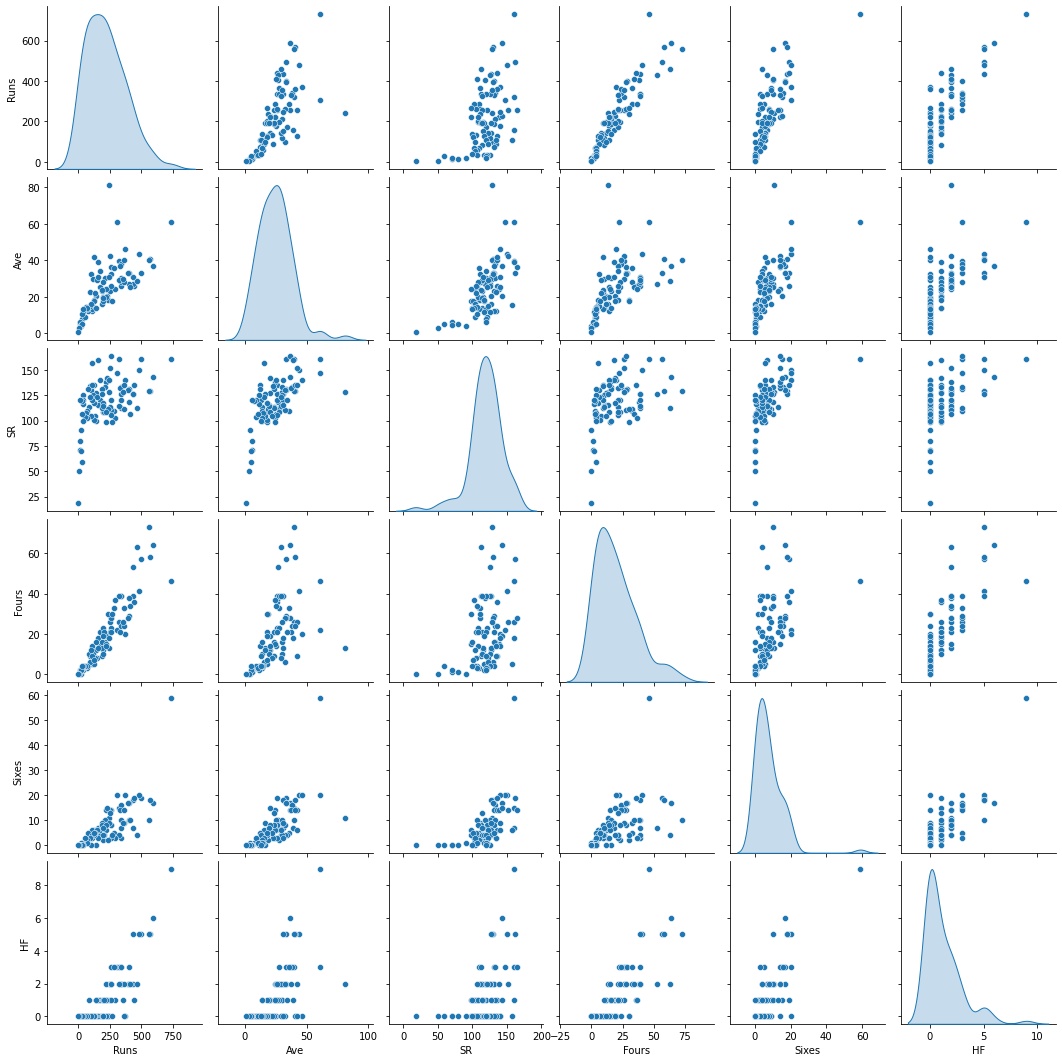

In [120]:
sns.pairplot(cricket_input.drop('Name',axis=1),diag_kind='kde');

All the variables have relations to some degree

Let's now build a data driven model by using all the performance features

Let's scale the data to bring everything to a common level

In [121]:
from scipy.stats import zscore

In [122]:
cricket_input_zscore = cricket_input.drop('Name',axis=1)

In [123]:
cricket_input_zscore = cricket_input_zscore.apply(zscore)

In [124]:
cricket_input_zscore

Runs       Ave        SR     Fours     Sixes        HF
1    3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
3    2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
5    1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
7    1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
9    2.246490  1.174755  0.444038  2.343021  1.309851  2.269533
..        ...       ...       ...       ...       ...       ...
171 -1.338197 -1.382959 -2.065234 -1.152093 -0.952365 -0.707989
173 -1.293147 -1.475256 -2.074160 -1.090775 -0.952365 -0.707989
175 -1.222355 -1.456796 -2.565132 -0.968140 -0.952365 -0.707989
177 -1.376812 -1.604470 -2.940057 -1.213411 -0.952365 -0.707989
179 -1.402554 -1.789063 -4.292674 -1.213411 -0.952365 -0.707989

[90 rows x 6 columns]

Let's give Runs the highest weightage followed by Ave and give SR, Fours, Sizes and HF the same weightage.
The weightages are 0.5, 0.3, 0.05, 0.05, 0.05 anad 0.05

Let's calculate an overall score based on the weightages for each record

In [125]:
def overall_score(x):
    return 0.5*x[0] + 0.3*x[1] + 0.05*x[2] + 0.05*x[3] + 0.05*x[4] + 0.05*x[5]

In [126]:
cricket_input_zscore['Score'] = cricket_input_zscore.apply(overall_score,axis=1)

Let's join this to our original dataset

In [127]:
cricket_input['Score'] = cricket_input_zscore['Score']

In [128]:
cricket_input

Name   Runs    Ave      SR  Fours  Sixes   HF     Score
1       CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0  3.180606
3      G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0  1.849574
5       V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0  1.457062
7       CL White  479.0  43.54  149.68   41.0   20.0  5.0  1.571730
9       S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0  1.793994
..           ...    ...    ...     ...    ...    ...  ...       ...
171       Z Khan   12.0   6.00   70.58    1.0    0.0  0.0 -1.327870
173   WD Parnell   19.0   4.75   70.37    2.0    0.0  0.0 -1.330415
175  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0 -1.307898
177     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0 -1.460438
179     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0 -1.596318

[90 rows x 8 columns]

Let's now find the rank of each record based on the Score variable

In [129]:
cricket_input['Rank'] = cricket_input['Score'].rank(ascending=False)

In [130]:
cricket_input

Name   Runs    Ave      SR  Fours  Sixes   HF     Score  Rank
1       CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0  3.180606   1.0
3      G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0  1.849574   2.0
5       V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0  1.457062   6.0
7       CL White  479.0  43.54  149.68   41.0   20.0  5.0  1.571730   5.0
9       S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0  1.793994   3.0
..           ...    ...    ...     ...    ...    ...  ...       ...   ...
171       Z Khan   12.0   6.00   70.58    1.0    0.0  0.0 -1.327870  87.0
173   WD Parnell   19.0   4.75   70.37    2.0    0.0  0.0 -1.330415  88.0
175  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0 -1.307898  84.0
177     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0 -1.460438  89.0
179     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0 -1.596318  90.0

[90 rows x 9 columns]

We have created a data driven model to rank all players using all the important performance features

# Part 5

1. Several dimesionality reduction techniques can be implemented using Python. They are PCA, Linear Discriminant Analysis, Factor Analysis, Backward Feature Elimination, Forward Feature Selection etc

2. We can use dimensional reduction on multimedia data. Below is a simple implementation

Let's import the relevant libraries

In [131]:
from sklearn.decomposition import PCA

In [132]:
import numpy as np
import matplotlib.image as mplib 
import matplotlib.pyplot as plt

Let's read a sample image

In [133]:
img = mplib.imread('SampleImage.png')

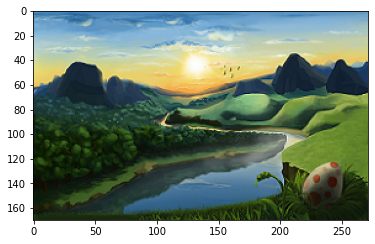

In [134]:
plt.imshow(img);

Let's apply PCA to compress this image

In [135]:
img.shape

(170, 272, 4)

Let's reshape the image to 2 dimensional

In [136]:
img_2 = np.reshape(img,(340,544))

The reshaped 2 dimensional image is below

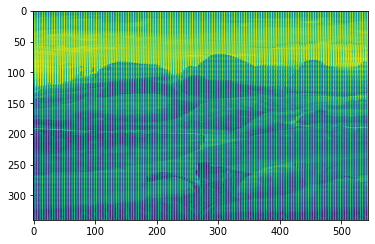

In [137]:
plt.imshow(img_2);

Let's see how much information is captured by 32 components

In [138]:
pca = PCA(n_components=32)

In [139]:
pca.fit(img_2)

PCA(n_components=32)

In [140]:
pca.explained_variance_

array([18.963352  ,  3.330865  ,  1.9721274 ,  1.1623383 ,  0.6700957 ,
        0.53747475,  0.34483638,  0.24345474,  0.20651267,  0.16722916,
        0.12561055,  0.11409583,  0.10901128,  0.09304174,  0.08090775,
        0.07417804,  0.06652516,  0.05863579,  0.05454944,  0.04719791,
        0.04162658,  0.04009254,  0.03770849,  0.03536361,  0.03318356,
        0.02990282,  0.02844284,  0.0276922 ,  0.02611346,  0.02377395,
        0.02351657,  0.02100347], dtype=float32)

In [141]:
np.sum(pca.explained_variance_ratio_)

0.98083156

We can see that 32 captures around 98% of the information. Let's go ahead with 32

In [142]:
pca = PCA(n_components=32)

In [143]:
Xpca = pca.fit_transform(img_2)

In [144]:
Xpca.shape

(340, 32)

Let's inverse transform it to get the original shape

In [145]:
temp = pca.inverse_transform(Xpca)

In [146]:
temp.shape

(340, 544)

Let's convert it to 3D

In [147]:
img_3 = np.reshape(temp,(170,272,4))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


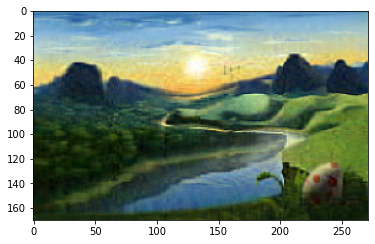

In [148]:
plt.imshow(img_3);

We can see that the image quality has come down but it is fine as we only have used 32 components which is more than a ten fold reduction.

I have used https://analyticsindiamag.com/how-does-pca-dimension-reduction-work-for-images/ as a reference for this demonstration.